<a href="https://colab.research.google.com/github/nEXOSkyline/IntroToPythonSkyline/blob/main/notebooks/Error_Propagation_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code can be used for Exercise 1, providing a quick introduction to using Python in a Jupyter worksheet.  Each block (called a cell) covers a specific step in the process.
In almost every language or platform, it is important to include the appropriate libraries of functions.  The import command accomplishes that in Python. Be aware that some of the cells in this template do not display any results - that doesn't mean that they were not doing important things behind the scenes!
For a reference to mathematical functions in numpy, go to http://docs.scipy.org/doc/numpy/reference/routines.math.html or a similar reference website.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In the next block, define any constants that you might need for your particular function.  This will make it easier to enter and read your function.
For the Monte Carlo simulation, we need to define how many times you will simulate the results, for the first example I set N to 10000, which is something that you can play with.

In [2]:
N = 10000

You need to define and initialize variables to represent the mean and standard error for each parameter in your particular function.
In my example, I was using mu for the mean and sigma for the errors, but you can create your own nomenclature!  Go ahead and name your variables so that it makes it easier to read and understand.

In [3]:
mu_x1 = 5.00
sigma_x1 = .20
mu_x2 = 6.50
sigma_x2 = .10

It is time to roll the dice and generate simulations of your parameters.  The random.normal function will generate a gaussian distribution of N values given a particular mean (mu) and deviation (sigma).  If you have more parameters, you'll need to generate an array of N values for each parameter.

In [4]:
x1 = np.random.normal(mu_x1,sigma_x1, N)
x2 = np.random.normal(mu_x2,sigma_x2, N)

Now that you've created your simulated data, define your particular function using your parameters.
You certainly could use a more appropriate name for the function, for example, call it path_difference if that is what you are simulating.  However, that means that you'll need to edit the rest of the file to use that name instead of my_function. It is a personal style choice for you to make.

In [5]:
my_function = x2 + x1

Calculate the mean and deviation of your simulated function.  These simulated or Monte Carlo results are independent of the traditional assumption that the function is $reasonably$ $linear$ over the range mu ± sigma.

In [7]:
my_average = np.mean(my_function)
my_error = np.std(my_function)

You may as well calculate the value and error of your function using the traditional method of error propagation.  Evaluate your function using the mean value of each parameter.  For the propagated error, you'll need to go through the appropriate derivatives and simplification.  For this example, I used the simplified result for adding/subtracting two parameters.

In [8]:
trad_average = mu_x2 + mu_x1
trad_error = math.sqrt(sigma_x2**2 + sigma_x1**2)

Time to look at the results!  Note that I have not constrained the significant digits, so you will need to round off the error appropriately (two significant digits) and then round the mean value to correspond to the last decimal place of the error.

In [9]:
print("Monte Carlo Result: ",my_average, " ± ", my_error)
print("Traditional Result: ",trad_average, " ± ", trad_error)

Monte Carlo Result:  11.504103535539107  ±  0.22493133667835816
Traditional Result:  11.5  ±  0.223606797749979


It can be useful to visualize the simulated data.  The following code will generate a 30 bin histogram, with an overlay of a gaussian function corresponding to your Monte Carlo results.

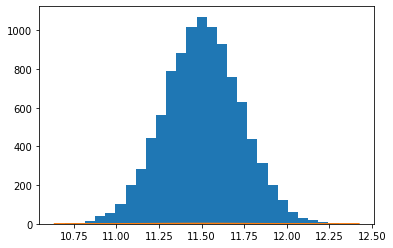

In [10]:
#count, bins, ignored = plt.hist(my_function, 30, normed=True)
count, bins, ignored = plt.hist(my_function, 30)
# create 30 points of a gaussian function based on the average and error
overlay = 1/(my_error * np.sqrt(2 * np.pi)) * np.exp( - (bins - my_average)**2 / (2 * my_error**2) )
# add that gaussian curve to the graph
plt.plot(bins,overlay)
plt.show()